In [14]:
from imblearn.under_sampling import RandomUnderSampler 

# UNDERSAMPLING 

In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
dataF=pd.read_excel('C:/Users/chihe/Desktop/data/DataCleaned.xlsx')
dataF

,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,...,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0.027778,0.354229,1,0.852632,0.274850,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.027778,0.521891,1,0.652632,0.155215,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0.111111,0.809950,1,0.852632,0.749166,0,0,1,0,1,...,0,0,0,1,0,1,1,0,1,0
3,0.388889,0.861194,1,0.831579,0.667111,0,1,1,0,1,...,0,1,0,1,0,1,1,0,1,0
4,0.680556,0.850249,1,0.884211,0.742050,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0
5,0.138889,0.367662,1,0.768421,0.872137,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0.013889,0.212935,1,1.000000,0.762731,1,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
7,0.013889,0.018905,1,0.915789,0.629086,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
8,0.652778,0.806965,1,0.757895,0.841895,0,1,1,0,1,...,0,0,0,1,0,1,1,0,1,0
9,0.013889,0.118905,1,0.968421,0.202802,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
dataF.rename(columns = {'Churn Value':'Churn'}, inplace = True) 

In [18]:
Y=dataF['Churn']
X=dataF.drop(['Churn'], axis=1)

In [19]:
yes=0
no=0 
for current in range(len(Y)) : 
    if Y[current]==0 :
        no=no+1 
    elif Y[current]==1 :
        yes=yes+1
yes

1869

In [20]:
# define undersample strateg
undersample = RandomUnderSampler(sampling_strategy=1)

In [21]:
X_over, y_over = undersample.fit_resample(X,Y)

In [22]:
yes=0
no=0 
for current in range(len(y_over)) : 
    if Y[current]==0 :
        no=no+1 
    elif Y[current]==1 :
        yes=yes+1
no

1869

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
X_over.columns

Index(['Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV',
       'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [25]:
feature_names = ('Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV',
       'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check') 
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
sfs1 = SFS(knn, 
           k_features=12, 
           forward=True, ### false will be Backward
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)
sfs1 = sfs1.fit(X_over,y_over, custom_feature_names=feature_names)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    9.5s finished

[2021-01-09 23:58:56] Features: 1/12 -- score: 0.83227480609597[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    7.1s finished

[2021-01-09 23:59:04] Features: 2/12 -- score: 0.8777479892761393[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.2s finished

[2021-01-09 23:59:10] Features: 3/12 -- score: 0.9031655460136772[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

{1: {'feature_idx': (2,),
  'cv_scores': array([0.79144385, 0.81818182, 0.82620321, 0.8315508 , 0.81550802,
         0.85561497, 0.86096257, 0.81550802, 0.85254692, 0.85522788]),
  'avg_score': 0.83227480609597,
  'feature_names': ('Churn Score',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.82887701, 0.87433155, 0.88235294, 0.87700535, 0.86363636,
         0.88502674, 0.90641711, 0.88235294, 0.89276139, 0.8847185 ]),
  'avg_score': 0.8777479892761393,
  'feature_names': ('Tenure Months', 'Churn Score')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.89037433, 0.90374332, 0.90374332, 0.90641711, 0.90106952,
         0.89839572, 0.89572193, 0.89304813, 0.90080429, 0.9383378 ]),
  'avg_score': 0.9031655460136772,
  'feature_names': ('Tenure Months', 'Monthly Charges', 'Churn Score')},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.88770053, 0.90106952, 0.89304813, 0.9197861 , 0.90909091,
         0.89839572, 0.90374332, 0.88770053, 0.92493298, 0.9383378 ]),
 

In [27]:
sffs = SFS(knn, 
           k_features=12, 
           forward=True, ### false will be Backward
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=10)
sffs = sffs.fit(X_over,y_over, custom_feature_names=feature_names)
sffs.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    9.0s finished

[2021-01-10 00:00:28] Features: 1/12 -- score: 0.83227480609597[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2021-01-10 00:00:35] Features: 2/12 -- score: 0.8777479892761393[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs

{1: {'feature_idx': (2,),
  'cv_scores': array([0.79144385, 0.81818182, 0.82620321, 0.8315508 , 0.81550802,
         0.85561497, 0.86096257, 0.81550802, 0.85254692, 0.85522788]),
  'avg_score': 0.83227480609597,
  'feature_names': ('Churn Score',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.82887701, 0.87433155, 0.88235294, 0.87700535, 0.86363636,
         0.88502674, 0.90641711, 0.88235294, 0.89276139, 0.8847185 ]),
  'avg_score': 0.8777479892761393,
  'feature_names': ('Tenure Months', 'Churn Score')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.89037433, 0.90374332, 0.90374332, 0.90641711, 0.90106952,
         0.89839572, 0.89572193, 0.89304813, 0.90080429, 0.9383378 ]),
  'avg_score': 0.9031655460136772,
  'feature_names': ('Tenure Months', 'Monthly Charges', 'Churn Score')},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.88770053, 0.90106952, 0.89304813, 0.9197861 , 0.90909091,
         0.89839572, 0.90374332, 0.88770053, 0.92493298, 0.9383378 ]),
 

In [28]:
sbfs = SFS(knn, 
           k_features=12, 
           forward=False, ### false will be Backward
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=10)
sbfs = sbfs.fit(X_over,y_over, custom_feature_names=feature_names)
sbfs.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   31.4s finished

[2021-01-10 00:02:44] Features: 26/12 -- score: 0.798821522272082[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   32.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished

[2021-01-10 00:03:19] Features: 25/12 -- score: 0.8073877077031153[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_j

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    6.4s finished

[2021-01-10 00:07:26] Features: 12/12 -- score: 0.9010315264297285

{27: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26),
  'cv_scores': array([0.80213904, 0.81818182, 0.78877005, 0.78342246, 0.80748663,
         0.76737968, 0.76737968, 0.76203209, 0.75871314, 0.77479893]),
  'avg_score': 0.7830303508193431,
  'feature_names': ('Tenure Months',
   'Monthly Charges',
   'Churn Score',
   'CLTV',
   'Senior Citizen_Yes',
   'Partner_Yes',
   'Dependents_Yes',
   'Multiple Lines_No phone service',
   'Multiple Lines_Yes',
   'Internet Service_Fiber optic',
   'Internet Service_No',
   'Online Security_No internet service',
   'Online Security_Yes',
   'Online Backup_No internet service',
   'Online Backup_Yes',
   'Device Protection_No internet service',
   'Device Protection_Yes',
   'Tech Support_No internet service',
   'Tech Support_Yes',
   'Streaming TV_No internet service',
   'Streaming TV_Yes',
   'Strea

In [29]:
sbs = SFS(knn, 
           k_features=12, 
           forward=False, ### false will be Backward
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)
sbs = sbs.fit(X_over,y_over, custom_feature_names=feature_names)
sbs.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   24.5s finished

[2021-01-10 00:07:52] Features: 26/12 -- score: 0.798821522272082[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   22.4s finished

[2021-01-10 00:08:14] Features: 25/12 -- score: 0.8073877077031153[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   19.3s finished

[2021-01-10 00:08:34] Features: 24/12 -- score: 0.8097948416510157[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

{27: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26),
  'cv_scores': array([0.80213904, 0.81818182, 0.78877005, 0.78342246, 0.80748663,
         0.76737968, 0.76737968, 0.76203209, 0.75871314, 0.77479893]),
  'avg_score': 0.7830303508193431,
  'feature_names': ('Tenure Months',
   'Monthly Charges',
   'Churn Score',
   'CLTV',
   'Senior Citizen_Yes',
   'Partner_Yes',
   'Dependents_Yes',
   'Multiple Lines_No phone service',
   'Multiple Lines_Yes',
   'Internet Service_Fiber optic',
   'Internet Service_No',
   'Online Security_No internet service',
   'Online Security_Yes',
   'Online Backup_No internet service',
   'Online Backup_Yes',
   'Device Protection_No internet service',
   'Device Protection_Yes',
   'Tech Support_No internet service',
   'Tech Support_Yes',
   'Streaming TV_No internet service',
   'Streaming TV_Yes',
   'Strea

In [30]:
resume=pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
resume

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.832275,0.0162227,"[0.7914438502673797, 0.8181818181818182, 0.826...","(2,)","(Churn Score,)",0.0218426,0.00728085
2,0.877748,0.0144611,"[0.8288770053475936, 0.8743315508021391, 0.882...","(0, 2)","(Tenure Months, Churn Score)",0.0194706,0.00649019
3,0.903166,0.0094018,"[0.8903743315508021, 0.9037433155080213, 0.903...","(0, 1, 2)","(Tenure Months, Monthly Charges, Churn Score)",0.0126587,0.00421957
4,0.906381,0.0118067,"[0.8877005347593583, 0.9010695187165776, 0.893...","(0, 1, 2, 4)","(Tenure Months, Monthly Charges, Churn Score, ...",0.0158968,0.00529892
5,0.907451,0.0132325,"[0.8850267379679144, 0.9090909090909091, 0.887...","(0, 1, 2, 4, 7)","(Tenure Months, Monthly Charges, Churn Score, ...",0.0178165,0.00593883
6,0.907717,0.0112719,"[0.8903743315508021, 0.9117647058823529, 0.906...","(0, 1, 2, 4, 7, 20)","(Tenure Months, Monthly Charges, Churn Score, ...",0.0151767,0.00505889
7,0.907717,0.0112719,"[0.8903743315508021, 0.9117647058823529, 0.906...","(0, 1, 2, 4, 7, 10, 20)","(Tenure Months, Monthly Charges, Churn Score, ...",0.0151767,0.00505889
8,0.907717,0.0112719,"[0.8903743315508021, 0.9117647058823529, 0.906...","(0, 1, 2, 4, 7, 10, 11, 20)","(Tenure Months, Monthly Charges, Churn Score, ...",0.0151767,0.00505889
9,0.907717,0.0112719,"[0.8903743315508021, 0.9117647058823529, 0.906...","(0, 1, 2, 4, 7, 10, 11, 13, 20)","(Tenure Months, Monthly Charges, Churn Score, ...",0.0151767,0.00505889
10,0.907717,0.0112719,"[0.8903743315508021, 0.9117647058823529, 0.906...","(0, 1, 2, 4, 7, 10, 11, 13, 15, 20)","(Tenure Months, Monthly Charges, Churn Score, ...",0.0151767,0.00505889


In [31]:
best_sfs_features=resume['feature_names'][12]

In [32]:
best_sfs_features

('Tenure Months',
 'Monthly Charges',
 'Churn Score',
 'Senior Citizen_Yes',
 'Multiple Lines_No phone service',
 'Internet Service_No',
 'Online Security_No internet service',
 'Online Backup_No internet service',
 'Device Protection_No internet service',
 'Tech Support_No internet service',
 'Streaming TV_No internet service',
 'Streaming TV_Yes')

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.25, random_state=0)

Text(0, 0.5, 'Erreur')

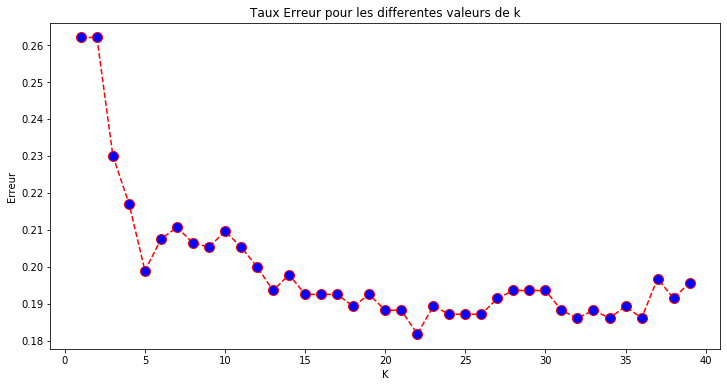

In [34]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [35]:
knn = KNeighborsClassifier(17)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [36]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.81


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[349 114]
 [ 66 406]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       463
           1       0.78      0.86      0.82       472

    accuracy                           0.81       935
   macro avg       0.81      0.81      0.81       935
weighted avg       0.81      0.81      0.81       935



In [39]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(X_over, 0.8)
len(set(corr_features))

7

In [41]:
X_over=X_over.drop(['Device Protection_No internet service','Online Backup_No internet service','Online Security_No internet service','Streaming TV_No internet service','Tech Support_No internet service'],axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over, test_size=0.25, random_state=0)

Text(0, 0.5, 'Erreur')

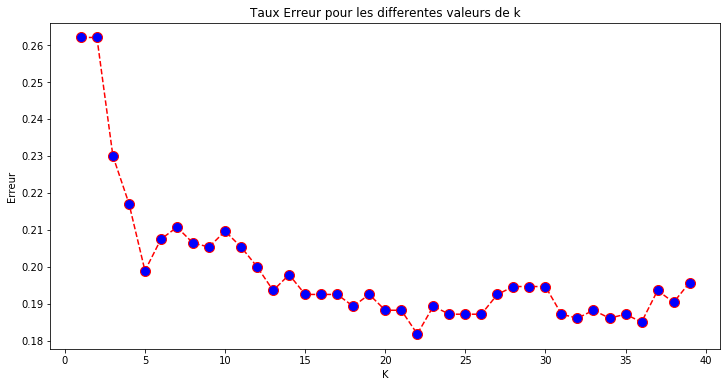

In [43]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [44]:
knn = KNeighborsClassifier(17)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [45]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.81


In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[349 114]
 [ 66 406]]


## Apply GridSearchCV to select the hyperparameters for different models : 


In [47]:
from sklearn.model_selection import GridSearchCV 

# KNN

In [48]:
parameters={'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(),
                            parameters,
                            verbose=1,
                            cv=3,
                            n_jobs=-1)
grid_result = grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.8s finished


In [49]:
grid_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [50]:
grid_search.best_score_

0.8098432364964673

In [51]:
knn = KNeighborsClassifier(11)
knn_model = knn.fit(X_train, y_train)
y_pred_knn =knn_model.predict(X_test)

In [52]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.79


In [53]:
print(confusion_matrix(y_test, y_pred_knn))

[[352 111]
 [ 81 391]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       463
           1       0.78      0.83      0.80       472

    accuracy                           0.79       935
   macro avg       0.80      0.79      0.79       935
weighted avg       0.80      0.79      0.79       935

